In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Desktop\laptops_dataset_final_600.csv")

In [2]:
df.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...


In [3]:
df.isnull().sum()

product_name      0
overall_rating    0
no_ratings        0
no_reviews        0
rating            0
title             0
review            0
dtype: int64

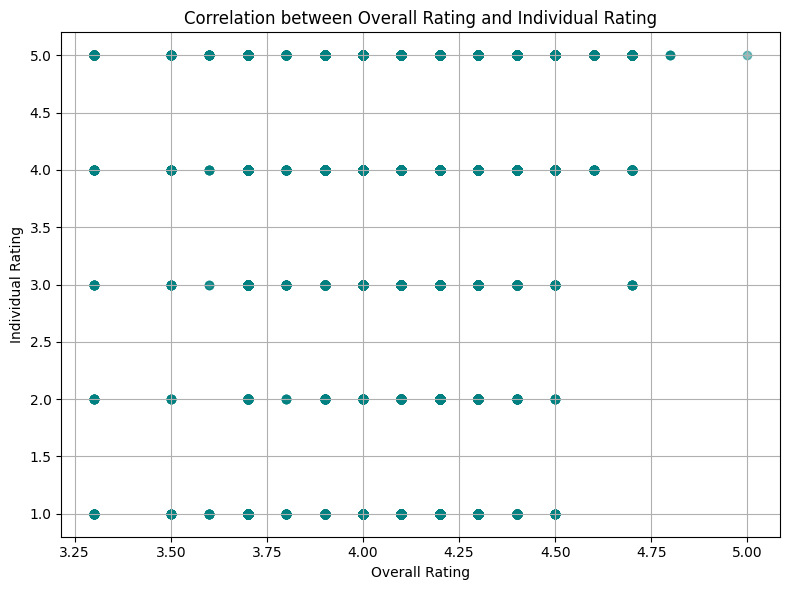

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_cleaned = df.dropna(subset=['overall_rating', 'rating'])
overall_rating = df_cleaned['overall_rating'].to_numpy(dtype=np.float64)
rating = df_cleaned['rating'].to_numpy(dtype=np.float64)

plt.figure(figsize=(8, 6))
plt.scatter(overall_rating, rating, alpha=0.5, color='teal')
plt.title('Correlation between Overall Rating and Individual Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Individual Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# IQR method for outlier detection
Q1_rating = np.percentile(rating, 25)
Q3_rating = np.percentile(rating, 75)
IQR_rating = Q3_rating - Q1_rating

lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

# Find outliers in 'rating'
outliers_rating = df_cleaned[(rating < lower_bound_rating) | (rating > upper_bound_rating)]
print("Outliers in rating:\n", outliers_rating[['rating', 'review']])


Outliers in rating:
        rating                                             review
204         1  Heating problem, battery backup not good , man...
206         1  Heating issue and not performing according to ...
210         1          Verry slow working dont buy this products
213         1                  Dont take any product in flipkart
217         1  worst product\nworst customer care service\ndo...
...       ...                                                ...
24082       1  Waste of money to buy product from flipkart,ho...
24086       2  Worst battery backup (1hour - 1.5 hours withou...
24096       2  I didn't like the heating noise in the laptop....
24106       2         Very low sound. You need external speaker.
24107       1                  Plastic body\nBody was a very bad

[2477 rows x 2 columns]


In [12]:
import pandas as pd

# Calculate skewness
rating_skewness = df_cleaned['rating'].skew()
overall_rating_skewness = df_cleaned['overall_rating'].skew()

print(f"Skewness of 'rating': {rating_skewness:.2f}")
print(f"Skewness of 'overall_rating': {overall_rating_skewness:.2f}")




Skewness of 'rating': -1.60
Skewness of 'overall_rating': -0.97


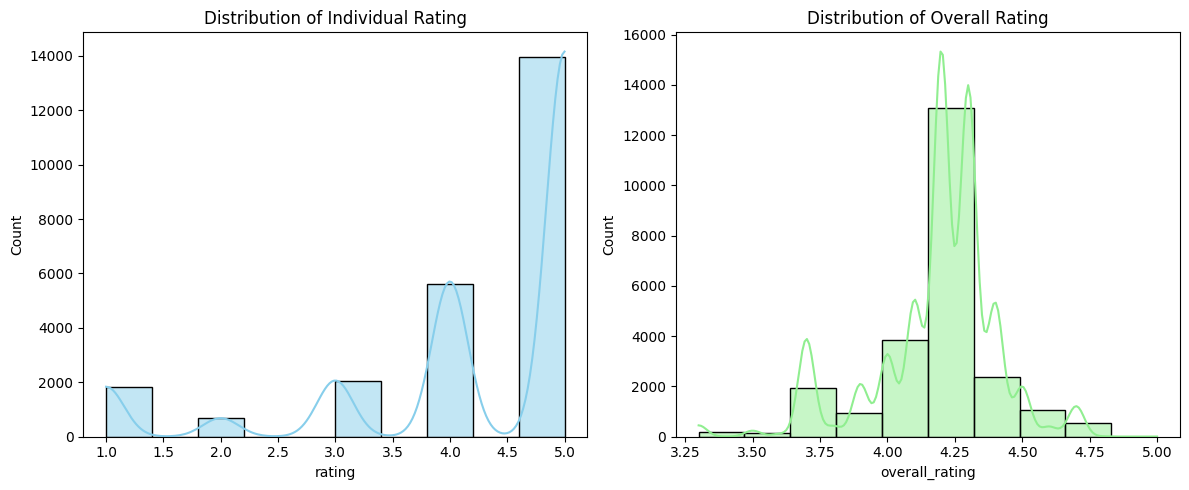

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Individual Rating")

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['overall_rating'], bins=10, kde=True, color='lightgreen')
plt.title("Distribution of Overall Rating")

plt.tight_layout()
plt.show()


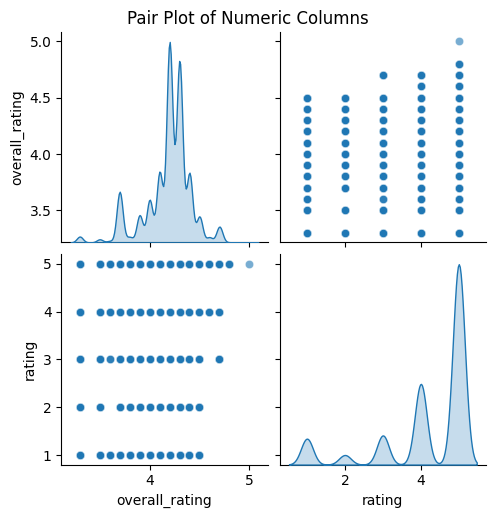

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df_cleaned[['overall_rating', 'rating']]

# Pair plot
sns.pairplot(numeric_cols, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Numeric Columns", y=1.02)
plt.show()


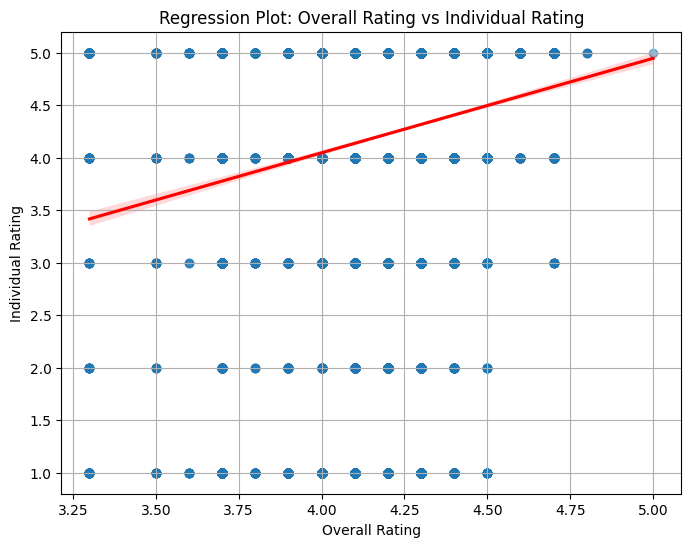

In [17]:
# Regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x='overall_rating', y='rating', data=df_cleaned, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot: Overall Rating vs Individual Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Individual Rating')
plt.grid(True)
plt.show()


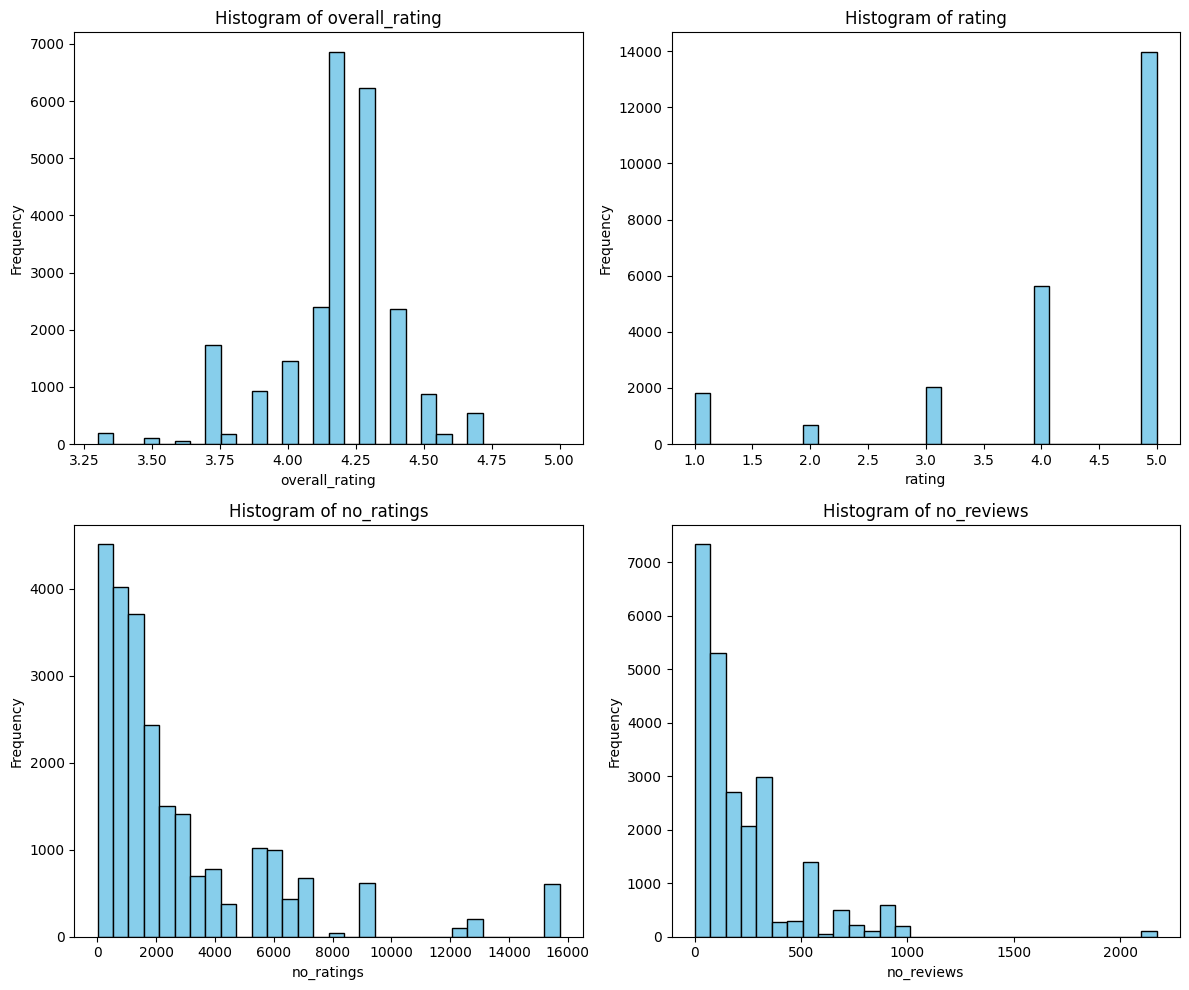

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\laptops_dataset_final_600.csv")

# Convert 'no_ratings' and 'no_reviews' to integers
df['no_ratings'] = df['no_ratings'].str.replace(',', '').astype(int)
df['no_reviews'] = df['no_reviews'].str.replace(',', '').astype(int)

# List of numerical columns
numerical_cols = ['overall_rating', 'rating', 'no_ratings', 'no_reviews']

# Plot histograms
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


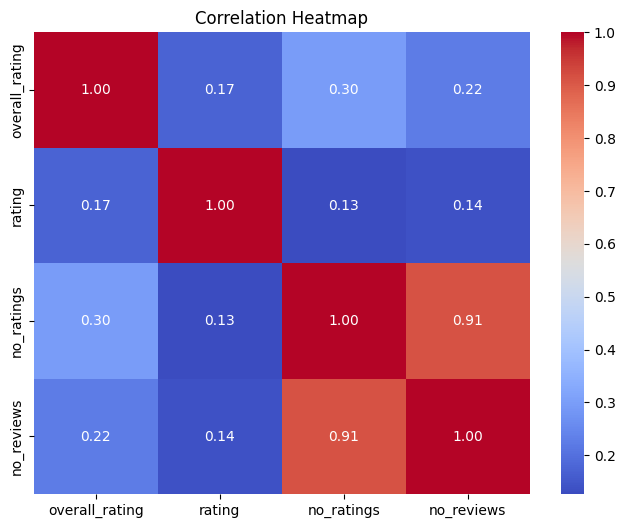

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\laptops_dataset_final_600.csv")

# Convert 'no_ratings' and 'no_reviews' to integers
df['no_ratings'] = df['no_ratings'].str.replace(',', '').astype(int)
df['no_reviews'] = df['no_reviews'].str.replace(',', '').astype(int)

# Select numerical columns for correlation
numerical_cols = ['overall_rating', 'rating', 'no_ratings', 'no_reviews']
corr = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


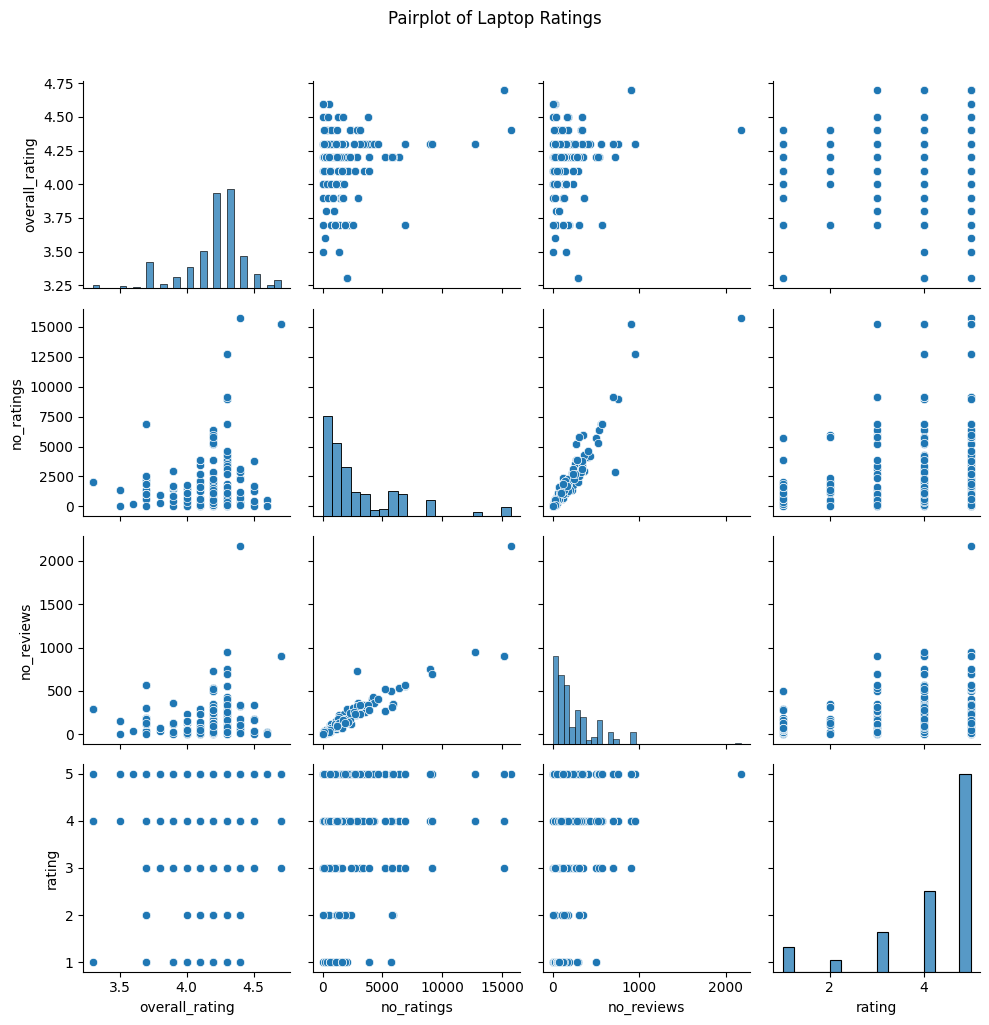

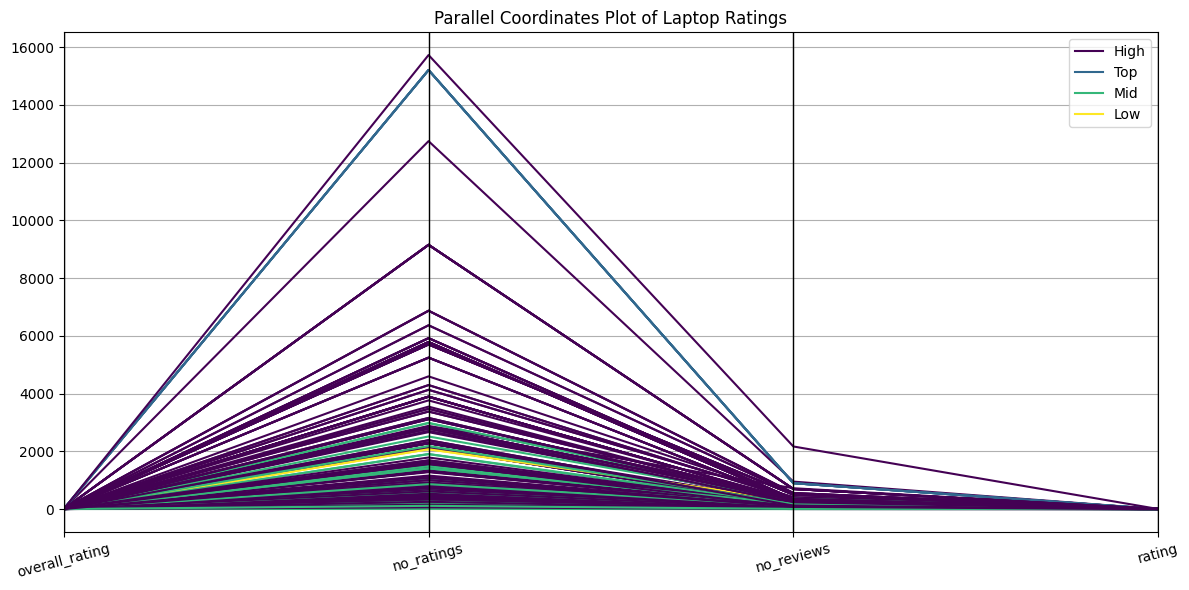

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# 1. Load dataset from your local path
df = pd.read_csv(r"C:\Users\HP\Desktop\laptops_dataset_final_600.csv")

# 2. Clean the data
df['no_ratings'] = df['no_ratings'].str.replace(',', '').astype(int)
df['no_reviews'] = df['no_reviews'].str.replace(',', '').astype(int)

# 3. Seaborn Pairplot
numeric_df = df[['overall_rating', 'no_ratings', 'no_reviews', 'rating']]
sns.pairplot(numeric_df.sample(500, random_state=1))  # Sample 500 rows for clarity
plt.suptitle("Pairplot of Laptop Ratings", y=1.02)
plt.tight_layout()
plt.show()

# 4. Parallel Coordinates Plot
# Create a rating bucket to color by
df['rating_bucket'] = pd.cut(df['overall_rating'], bins=[0, 3.5, 4.0, 4.5, 5.0], labels=["Low", "Mid", "High", "Top"])

# Sample 200 rows to make the plot readable
parallel_sample = df[['overall_rating', 'no_ratings', 'no_reviews', 'rating', 'rating_bucket']].sample(200, random_state=1)

plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_sample, class_column='rating_bucket', colormap=plt.cm.viridis)
plt.title("Parallel Coordinates Plot of Laptop Ratings")
plt.grid(True)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
